This notebook details how I make the call directionality function taken from Giuggioli et al. 2015.

In [2]:
import matplotlib.pyplot as plt 
plt.rcParams['agg.path.chunksize'] = 10000
import matplotlib.image as mpimg
import pandas as pd
import numpy as np 
import os 

In [3]:
from the_cocktail_party_nightmare_MC import call_directionality_factor 

### 1: Let's get th call directionality function as per Giuggioli et al. 2015:

In [4]:
# the Asymmetry parameter used to specify the shape of the call directionality function
A = 7.0 
angles = np.linspace(0, 2*np.pi,50)

directionality_factor = []
for angle in angles:
    directionality_factor.append( call_directionality_factor(A, angle))
    

### 2: Let's generate the temporal masking function :

In [5]:
masking_dataset = pd.DataFrame()
masking_dataset['timegap_ms'] = np.array([-0.65,0,3,6,12,24])
masking_dataset['dB_leveldiff'] = np.array([-22,-8,-17,-23,-29,-34])


new_timegaps = np.linspace(25,-1,100)
interp_dBleveldiff = np.interp(new_timegaps,masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'])
#plt.plot(masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'],'*-',linewidth=10,alpha=0.3,markersize=20,
#        label='Original data')
#plt.plot(new_timegaps,interp_dBleveldiff,'*-',label='Interpolated data')

### 3: Let's generate the spatial unmasking function:

In [6]:
fig4b = pd.read_csv('data/Suemer_et_al_2009_fig4b.csv')
fig4b['deltaTS_thickwire'] = fig4b['target_strength'] - fig4b['target_strength'][0] # the different in target strength from 
# the original 1.2 mm wire 

fig4b['delta_level'] = fig4b['deltaTS_thickwire'] - 22.3


#calculate polynomial fit
P= np.polyfit(fig4b['masker_angle'],fig4b['delta_level'],2)
ts_pred = np.polyval(P,fig4b['masker_angle'])
fit_error = fig4b['delta_level']-ts_pred




## set the values as separate columns
fig4b['quad_fit'] = ts_pred
fig4b['quad_release'] = ts_pred-ts_pred[0]

# create a new interpolated set of spatial release vs angular separation values:
theta_sep = np.linspace(0,23,50)
deltaecholevel = np.polyval(P,theta_sep)
deltaecholevel += -deltaecholevel[0]

spatial_release_fn = pd.DataFrame(index =range(deltaecholevel.size),columns=['deltatheta','dB_release'])
spatial_release_fn['deltatheta'] = theta_sep
spatial_release_fn['dB_release'] = deltaecholevel


In [7]:
%matplotlib notebook

In [8]:
#load the theta received/emission plots
fig_path = os.path.join('plots/','emission_reception_angle_plain.png')

fig_thetarelation = mpimg.imread(fig_path)
#crop the image to remove empty space
fig_thetarelation = fig_thetarelation[:610, 100:]

<IPython.core.display.Javascript object>


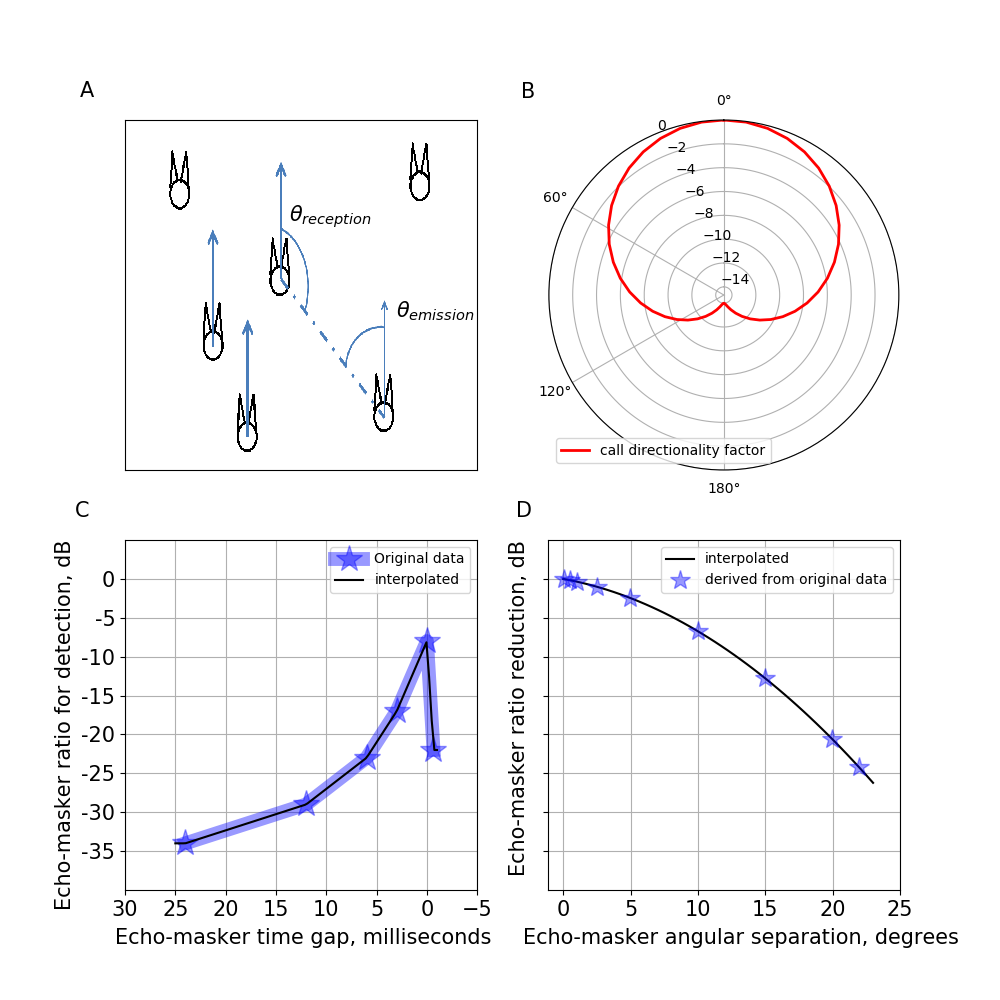

Text(-4,3,'Echo-masker ratio reduction, dB')

In [18]:
fig = plt.figure(figsize=(10,10))


ax3 = plt.subplot(221)
plt.imshow(fig_thetarelation, aspect='auto')
plt.xticks([]);plt.yticks([])
plt.text(660, 343, '$ \\theta_{emission}$', fontsize =15)
plt.text(400, 177, '$ \\theta_{reception}$', fontsize =15)
plt.text(-110, -40,'A',fontsize=15)



ax = plt.subplot(222, polar=True)
ax.plot(angles, directionality_factor, color='r', linewidth=2, label='call directionality factor')
ax.set_theta_zero_location('N')
plt.legend()
plt.text(0.8, 9,'B',fontsize=15)
# set the locations of the angular gridlines
lines, labels = plt.thetagrids(np.arange(0,240,60) )



ax1 = plt.subplot(223)
plt.plot(masking_dataset['timegap_ms'],masking_dataset['dB_leveldiff'],'b*-',linewidth=10,alpha=0.4,markersize=20,
        label='Original data')
plt.plot(new_timegaps,interp_dBleveldiff,'k-',label='interpolated')
plt.xlim(30,-5);plt.grid(); plt.ylim(-40,-5)
plt.legend()
plt.text(35, 8,'C',fontsize=15)
plt.xticks(np.arange(-5,35,5))
ax1.set_yticks(np.arange(0,-40, -5))
ax1.set_yticklabels(np.arange(0,-40, -5))
plt.ylim(-40,5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.text(37, 3, 'Echo-masker ratio for detection, dB', rotation=90, fontsize=15 )
plt.text(31,-47, 'Echo-masker time gap, milliseconds', fontsize=15)


ax2 = plt.subplot(224)
plt.plot(theta_sep,deltaecholevel,'k-', label='interpolated') ;
plt.plot(fig4b['masker_angle'],fig4b['quad_release'],'b*',markersize=15,alpha=0.4, label='derived from original data')
plt.grid()
plt.legend()
plt.ylim(-40,5)
ax2.set_xticks(np.arange(0,30,5))
ax2.set_yticks(np.arange(0,-40, -5))
ax2.set_yticklabels([])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.text(-3.5, 8,'D',fontsize=15)
plt.text(-3,-47, 'Echo-masker angular separation, degrees', fontsize=15)
plt.text(-4, 3, 'Echo-masker ratio reduction, dB', rotation=90, fontsize=15 )




In [19]:
plt.savefig('plots/multipanel_SI.png',dpi=400,pad_inches = 0, bbox_inches='tight')